In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from math import pi
from random import randint
import numpy.random as rand
import matplotlib.colors as colors
cconverter=colors.ColorConverter()

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [11]:
lat = np.linspace(-np.pi/2, np.pi/2, 60)
lon = np.linspace(-np.pi,   np.pi,  120)
r   = 100.
x3d = r * np.outer(np.cos(np.pi+lon), np.sin(np.pi/2 + lat))
y3d = r * np.outer(np.sin(np.pi+lon), np.sin(np.pi/2 + lat))
z3d = r * np.outer(np.ones(np.size(lon)), np.cos(np.pi/2 + lat))

In [61]:
f_surface = 0.01

In [62]:
el_colors = np.full(x3d.shape, "y", dtype=str)
N_elems = len(lat)*len(lon)
N_spots = int(f_surface*N_elems)
for n in range(N_spots):
    x_spot = rand.randint(0, x3d.shape[0])
    y_spot = rand.randint(0, x3d.shape[1])
    
    el_colors[x_spot, y_spot] = "r"

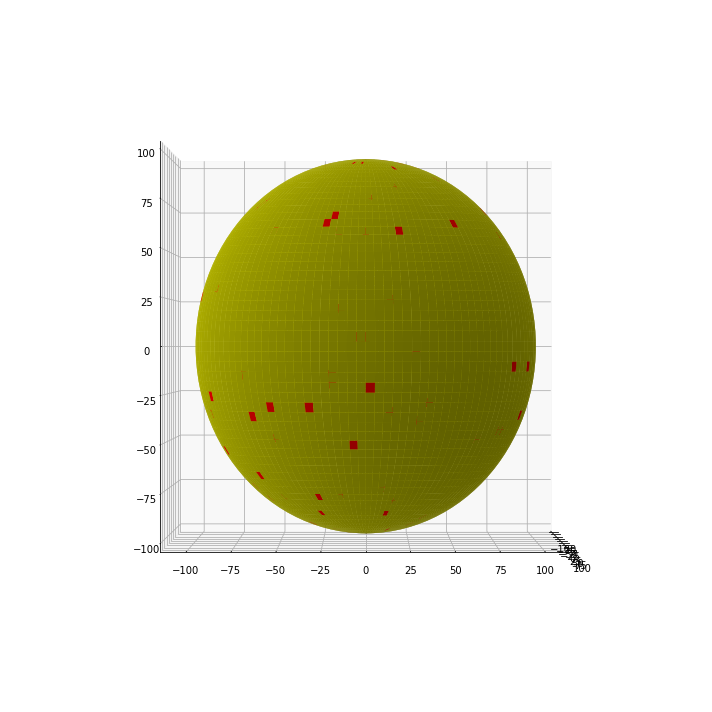

In [63]:
fig = plt.figure(figsize=(10,10))

ax  = fig.add_subplot(111, projection="3d")

sp = ax.plot_surface(x3d, y3d, z3d, rstride=1, cstride=1, facecolors=el_colors, linewidth=0)

ax.view_init(azim=0,elev=0)

fig.tight_layout()

In [64]:
fluxes = np.empty((lon.shape[0], lat.shape[0], 1))
specks = np.empty((lon.shape[0], lat.shape[0], 1), dtype="U1")

for i in range(len(lon)):
    for j in range(len(lat)):
        if el_colors[i, j] == 'r':
            b = 0.8
        else:
            b = 1.0
        fluxes[i, j] = b
        specks[i, j] = el_colors[i, j]
        
#for i in range(90):
#    for j in range(60):    
#        pl=plt.plot(x3d[i], y3d[j], 's', ms = 11.0, c=specks[30+i, j][0])
#        plt.plot(x3d[i], -3d[j], 's', ms = 11.0, c=specks[30+i, j][0])
#        plt.ylim(top=100)
#        plt.ylim(bottom = -100)

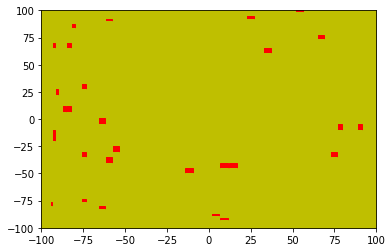

In [65]:
x  = r*np.sin(lon+np.pi/2)
y  = r*np.sin(lat)
zp = 10
for i in range(60):
    for j in range(60):
        if zp + i < x.shape[0]:
            k = zp + i
        elif zp + i >= 120:
            k = i - (x.shape[0] - zp)
        else:
            print("Whoops")
            break
        pl=plt.plot(-x[i], -y[j], 's', ms = 8.0, c=specks[k, j][0])
        plt.ylim(-r, r)
        plt.xlim(-r, r)

In [68]:
deltaX = []
deltaY = []
apc = []
fpc = []
spot_ratio = .1

for i in range(len(x)-1):
    if x[i] > 0:
        deltaX.append(np.absolute((x[i]-x[i+1])))
        
del deltaX[0]
        
for i in range(len(y)-1):
    deltaY.append(np.absolute((y[i]-y[i+1])))

for i in range(len(deltaX)):
    apc.append(deltaX[i]*deltaY[i])

apparent_area = sum(apc)

for i in range(len(apc)):
    if el_colors[i, j] == 'r':
        fpc.append(spot_ratio*apc[i])
    else:
        fpc.append(1*apc[i])

flux_received = sum(fpc)

print("Apparent Area: ", apparent_area)
print("Flux Received: ", flux_received)

Apparent Area:  525.236622786401
Flux Received:  525.236622786401


59
59
[0.7450561154905351, 2.2190239986088067, 3.657752018765557, 5.045145886737537, 6.365688078946354, 7.604612184196124, 8.748068811306567, 9.783281193590627, 10.69868874188519, 11.484076933250996, 12.13069207597775, 12.631339661455575, 12.980465197885405, 13.174216617618805, 13.210487556955286, 13.0889410221247, 12.811013175558504, 12.379897199908502, 11.800507421107891, 11.079424093569745, 10.224819467887778, 9.24636597170285, 8.155127535367564, 6.963435283417558, 5.684748988512082, 4.33350584447812, 2.9249582575630337, 1.4750024783871696, 0.0, 1.4834062712835259, 2.958479006858964, 4.408574507687724, 5.817329704178997, 7.168846003066722, 8.447867915675218, 9.63995446059757, 10.731641414999574, 11.710592591574631, 12.565738441486028, 13.287400426022193, 13.867399759592987, 14.29914930228608, 14.577727569529294, 14.699934027322103, 14.664325051770765, 14.471230148902025, 14.122748252521458, 13.622724141708426, 12.976705242909672, 12.191879301981938, 11.276993626464671, 10.2422568054

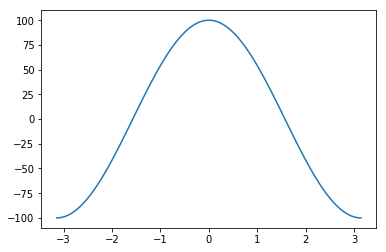

In [69]:
print(len(deltaX))
print(len(deltaY))
print(apc)
plt.plot(lon,x)